### WeatherPy by Eric Roberts

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
import json
import csv

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=lat_range[0], high=lat_range[1], size=1500)
lngs = np.random.uniform(low=lng_range[0], high=lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

612

In [5]:
def weatherurl(cityname,country):
    #api.openweathermap.org/data/2.5/weather?q={city name},{country code}

    base_url = "http://api.openweathermap.org/data/2.5/weather?q="
    base_url += cityname
    base_url += ","
    base_url += country
    base_url += "&appid="
    base_url += api_key
    return base_url


def convert_from_k_to_f(k):
    #T(°F) = T(K) × 9/5 - 459.67
    f = (k * (9/5)) - 459.67
    return f

def mps_to_mph(mps):
    return 2.23694 * mps

cityprogress = 0
loc = 0
with open(output_data_file, 'w', newline='') as csvfile:
    w = csv.writer(csvfile, delimiter=',')
    
    headers = ['City', 'Cloudiness', 'Country', 'Date', 'Humidity', 'Lat', 'Lng', 'Max Temp (F)', 'Wind Speed']
    w.writerow(headers)
    df = pd.DataFrame(columns=headers)

    #cities[:50]
    for city in cities:
        url = weatherurl(city.city_name,city.country_code)
        response = requests.get(url)
        r = response.json()
        cityprogress +=1
        progress_string = "Retrieving City "+str(cityprogress)+" of "+str(len(cities))+" | "+city.city_name
        if (r['cod'] == 200):
            #retrieve these features:
            #City, Cloudiness, Country, Date, Humidity, Lat, Lng, Max Temp, Wind Speed
            row = [r['name'],r['clouds']['all'],r['sys']['country'],r['dt'],r['main']['humidity'],r['coord']['lat'],r['coord']['lon'],convert_from_k_to_f(r['main']['temp_max']),mps_to_mph(r['wind']['speed'])]
            w.writerow(row)
            df.loc[loc] = row
            loc+=1
        else:
            progress_string+=" << 404, Not Found >>"
        print (progress_string)

            
    print ("Writing Complete")


Retrieving City 1 of 612 | svetlyy << 404, Not Found >>
Retrieving City 2 of 612 | utete
Retrieving City 3 of 612 | cambara
Retrieving City 4 of 612 | hithadhoo
Retrieving City 5 of 612 | rikitea
Retrieving City 6 of 612 | surenavan
Retrieving City 7 of 612 | lazaro cardenas
Retrieving City 8 of 612 | neiafu
Retrieving City 9 of 612 | belushya guba << 404, Not Found >>
Retrieving City 10 of 612 | vanimo
Retrieving City 11 of 612 | mys shmidta << 404, Not Found >>
Retrieving City 12 of 612 | severo-kurilsk
Retrieving City 13 of 612 | mar del plata
Retrieving City 14 of 612 | kugesi
Retrieving City 15 of 612 | new norfolk
Retrieving City 16 of 612 | ushuaia
Retrieving City 17 of 612 | punta arenas
Retrieving City 18 of 612 | pacifica
Retrieving City 19 of 612 | ngerengere
Retrieving City 20 of 612 | san borja
Retrieving City 21 of 612 | yulara
Retrieving City 22 of 612 | mahebourg
Retrieving City 23 of 612 | mataura << 404, Not Found >>
Retrieving City 24 of 612 | faanui
Retrieving City 

Retrieving City 200 of 612 | aykhal
Retrieving City 201 of 612 | kamenskoye << 404, Not Found >>
Retrieving City 202 of 612 | half moon bay
Retrieving City 203 of 612 | columbia
Retrieving City 204 of 612 | coos bay
Retrieving City 205 of 612 | xam nua
Retrieving City 206 of 612 | luderitz
Retrieving City 207 of 612 | vreed en hoop << 404, Not Found >>
Retrieving City 208 of 612 | whyalla
Retrieving City 209 of 612 | brae
Retrieving City 210 of 612 | achisay << 404, Not Found >>
Retrieving City 211 of 612 | ola
Retrieving City 212 of 612 | obo
Retrieving City 213 of 612 | maumere
Retrieving City 214 of 612 | dori
Retrieving City 215 of 612 | cherskiy
Retrieving City 216 of 612 | nouadhibou
Retrieving City 217 of 612 | tromso
Retrieving City 218 of 612 | licheng
Retrieving City 219 of 612 | esmeraldas
Retrieving City 220 of 612 | pareora
Retrieving City 221 of 612 | razole
Retrieving City 222 of 612 | oistins
Retrieving City 223 of 612 | aklavik
Retrieving City 224 of 612 | padang
Retri

Retrieving City 398 of 612 | wanaka
Retrieving City 399 of 612 | toliary << 404, Not Found >>
Retrieving City 400 of 612 | znamenskoye
Retrieving City 401 of 612 | college
Retrieving City 402 of 612 | porto torres
Retrieving City 403 of 612 | labuhan
Retrieving City 404 of 612 | tokat
Retrieving City 405 of 612 | krasnokamensk
Retrieving City 406 of 612 | port-gentil
Retrieving City 407 of 612 | iqaluit
Retrieving City 408 of 612 | quelimane
Retrieving City 409 of 612 | boa vista
Retrieving City 410 of 612 | marcona << 404, Not Found >>
Retrieving City 411 of 612 | manta
Retrieving City 412 of 612 | bria
Retrieving City 413 of 612 | hualmay
Retrieving City 414 of 612 | zalakomar
Retrieving City 415 of 612 | ulundi
Retrieving City 416 of 612 | zacoalco << 404, Not Found >>
Retrieving City 417 of 612 | arkhangelsk
Retrieving City 418 of 612 | dryden
Retrieving City 419 of 612 | colares
Retrieving City 420 of 612 | pasir gudang
Retrieving City 421 of 612 | tarko-sale
Retrieving City 422 o

Retrieving City 600 of 612 | astana
Retrieving City 601 of 612 | mikhaylovka
Retrieving City 602 of 612 | abalak
Retrieving City 603 of 612 | riberalta
Retrieving City 604 of 612 | sahuaripa
Retrieving City 605 of 612 | akdepe
Retrieving City 606 of 612 | isla vista
Retrieving City 607 of 612 | madang
Retrieving City 608 of 612 | coolum beach
Retrieving City 609 of 612 | sirjan
Retrieving City 610 of 612 | salinas
Retrieving City 611 of 612 | oildale
Retrieving City 612 of 612 | portree
Writing Complete


In [6]:
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp (F),Wind Speed
0,Utete,0,TZ,1567878395,68,-7.99,38.76,73.6916,7.985876
1,Cambara,54,BR,1567878395,33,-23.05,-50.07,92.9516,5.637089
2,Hithadhoo,100,MV,1567878395,79,-0.60,73.08,83.0516,13.197946
3,Rikitea,98,PF,1567878395,66,-23.12,-134.97,66.3116,24.897142
4,Surenavan,40,AM,1567878395,46,39.75,44.80,71.6000,18.342908


In [7]:
def find_the_date():
    ts = int(min(list(df['Date'])))
    return datetime.utcfromtimestamp(ts).strftime('%Y-%m-%d')

the_date = find_the_date()

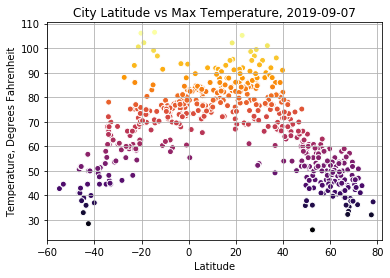

In [18]:
lat_p = list(df['Lat'])
temp_p = list(df['Max Temp (F)'])
plt.xlim(-60, 82)
plt.grid(True)


plt.scatter(lat_p, temp_p, c=temp_p,marker="o", edgecolors="white", cmap="inferno")
plt.title("City Latitude vs Max Temperature, "+the_date)
plt.xlabel("Latitude")
plt.ylabel("Temperature, Degrees Fahrenheit")

plt.savefig("./Images/lat_vs_temp.png")

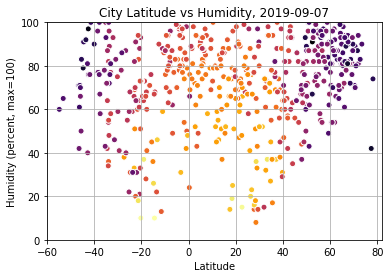

In [19]:
plt.xlim(-60, 82)
plt.ylim(0, 100)

plt.grid(True)

plt.scatter(lat_p, list(df['Humidity']),  c=temp_p,marker="o", edgecolors="white", cmap="inferno")
plt.title("City Latitude vs Humidity, "+the_date)
plt.xlabel("Latitude")
plt.ylabel("Humidity (percent, max=100)")

plt.savefig("./Images/lat_vs_hum.png")

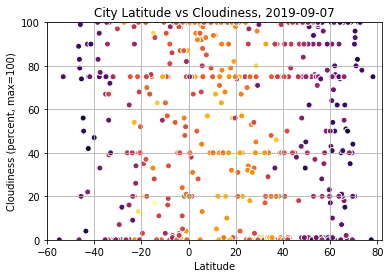

In [20]:
plt.xlim(-60, 82)
plt.ylim(0, 100)

plt.grid(True)

plt.scatter(lat_p, list(df['Cloudiness']),  c=temp_p,marker="o", edgecolors="white", cmap="inferno")
plt.title("City Latitude vs Cloudiness, "+the_date)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (percent, max=100)")

plt.savefig("./Images/lat_vs_clod.png")

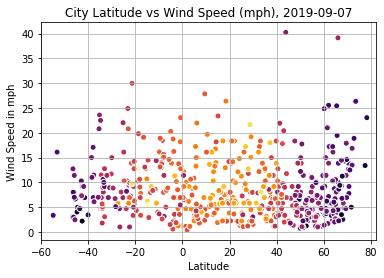

In [21]:
plt.xlim(-60, 82)

plt.grid(True)

plt.scatter(lat_p, list(df['Wind Speed']),  c=temp_p,marker="o", edgecolors="white", cmap="inferno")
plt.title("City Latitude vs Wind Speed (mph), "+the_date)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed in mph")

plt.savefig("./Images/lat_vs_wind.png")